# 1주차 과제
- 파이토치 시작하기 및 간단한 코드 빈칸 채워넣기

## 파이토치 시작하기

In [1]:
import torch

- tensor 개념 파악 (array of numerical values(vector, matrix..))
- 4x3 행렬 두 개 만들고 행으로 병합, 열로 병합


In [2]:
X=torch.randn(4, 3)
Y=torch.randn(4, 3)

# 행으로 병합 코드
concat_row = torch.cat((X, Y), dim=1)
# 열로 병합 코드
concat_col = torch.cat((X, Y), dim=0)
concat_row, concat_col

(tensor([[ 1.4216e-01, -1.8872e+00,  2.4502e-01,  1.1883e-01,  3.2182e-01,
          -3.7317e-04],
         [ 5.7130e-01,  1.7093e-01, -8.5145e-01, -7.9519e-01,  3.2291e-01,
           5.6876e-01],
         [ 4.3465e-01,  1.7815e+00, -3.6006e-01, -1.1222e+00, -4.2176e-01,
          -6.9986e-01],
         [ 1.3389e+00, -6.2534e-02,  3.4491e-02,  1.1957e-01,  1.6468e-01,
           1.4529e+00]]),
 tensor([[ 1.4216e-01, -1.8872e+00,  2.4502e-01],
         [ 5.7130e-01,  1.7093e-01, -8.5145e-01],
         [ 4.3465e-01,  1.7815e+00, -3.6006e-01],
         [ 1.3389e+00, -6.2534e-02,  3.4491e-02],
         [ 1.1883e-01,  3.2182e-01, -3.7317e-04],
         [-7.9519e-01,  3.2291e-01,  5.6876e-01],
         [-1.1222e+00, -4.2176e-01, -6.9986e-01],
         [ 1.1957e-01,  1.6468e-01,  1.4529e+00]]))

### Linear Regression Implementation from Scratch
- 머신러닝 기초와 비슷한 내용이지만 파이토치로 실행해보며 익숙해지는것이 목표


In [3]:
!pip install d2l # d2l 라이브러리에서 제공하는 기능 사용 위함

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 766.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:


In [170]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [171]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = synthetic_data(true_w, true_b, 2000)

In [172]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-1.2684,  0.0935]) 
label: tensor([1.5671])


In [173]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    ###반복문으로 채워넣기:
    for i in range(0, num_examples, batch_size):
        ##이하는 반복문에 대한 조건입니다.
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [174]:
batch_size = 20

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.4580,  0.3143],
        [-0.8135,  0.6222],
        [ 0.1912, -0.2341],
        [-2.0934,  0.9945],
        [ 0.6602, -2.0069],
        [-1.3900, -0.3147],
        [-0.5085,  0.9631],
        [-1.0371,  1.2372],
        [ 0.6060,  0.5463],
        [ 1.0714,  0.2157],
        [ 1.1295,  0.3768],
        [-1.6826,  0.7622],
        [ 2.2395,  0.6684],
        [-0.1191,  0.4713],
        [ 0.2649,  0.7661],
        [-0.9146,  0.6844],
        [-0.5876, -1.3863],
        [-0.6439, -1.4595],
        [-1.7606, -1.4878],
        [ 0.0552,  1.5581]]) 
 tensor([[ 6.4129],
        [ 2.1218],
        [ 6.3996],
        [-2.2783],
        [10.4941],
        [ 1.7869],
        [ 2.5361],
        [ 0.5290],
        [ 6.4844],
        [ 8.4176],
        [ 8.3241],
        [-0.6966],
        [11.2022],
        [ 4.4479],
        [ 5.1427],
        [ 1.7275],
        [ 5.8200],
        [ 5.7571],
        [ 2.4550],
        [ 3.3254]])


In [175]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([1.0], requires_grad=True) #원하는 실수를 넣어주세요

In [176]:
def linreg(X, w, b):
    """The linear regression model."""
    return torch.matmul(X, w) + b ###lr func 코드 완성하기

In [177]:
def squared_loss(y_hat, y):
    """Squared loss."""
    return torch.mean((y_hat - y)**2) ###loss function 직접 짜보기

In [178]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent."""
    with torch.no_grad():
        ###반복문으로 채워넣기
        for param in params:
          param -= lr * param.grad / batch_size
          param.grad.zero_()

In [179]:
lr = 0.01 ###직접 설정
num_epochs = 100 ###직접 설정
net = linreg ###위에서 가져오기
loss = squared_loss ###위에서 가져오기

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y) ###채워넣기
        # Compute gradient on `l` with respect to [`w`, `b`]
        l.sum().backward()
        sgd([w, b], lr, batch_size) ###채워넣기
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 25.610168
epoch 2, loss 20.990843
epoch 3, loss 17.204752
epoch 4, loss 14.101559
epoch 5, loss 11.558074
epoch 6, loss 9.473344
epoch 7, loss 7.764650
epoch 8, loss 6.364155
epoch 9, loss 5.216268
epoch 10, loss 4.275427
epoch 11, loss 3.504294
epoch 12, loss 2.872252
epoch 13, loss 2.354210
epoch 14, loss 1.929599
epoch 15, loss 1.581585
epoch 16, loss 1.296337
epoch 17, loss 1.062539
epoch 18, loss 0.870909
epoch 19, loss 0.713844
epoch 20, loss 0.585106
epoch 21, loss 0.479587
epoch 22, loss 0.393101
epoch 23, loss 0.322215
epoch 24, loss 0.264116
epoch 25, loss 0.216496
epoch 26, loss 0.177464
epoch 27, loss 0.145473
epoch 28, loss 0.119254
epoch 29, loss 0.097762
epoch 30, loss 0.080147
epoch 31, loss 0.065708
epoch 32, loss 0.053874
epoch 33, loss 0.044176
epoch 34, loss 0.036227
epoch 35, loss 0.029711
epoch 36, loss 0.024370
epoch 37, loss 0.019994
epoch 38, loss 0.016406
epoch 39, loss 0.013465
epoch 40, loss 0.011054
epoch 41, loss 0.009079
epoch 42, loss 0.007

In [180]:
print(f'error in estimating w: {true_w - w.reshape(true_w.shape)}')
print(f'error in estimating b: {true_b - b}')

error in estimating w: tensor([ 0.0002, -0.0001], grad_fn=<SubBackward0>)
error in estimating b: tensor([9.2030e-05], grad_fn=<RsubBackward1>)


\+ cost graph 그리기 (x축 w, y축 loss)

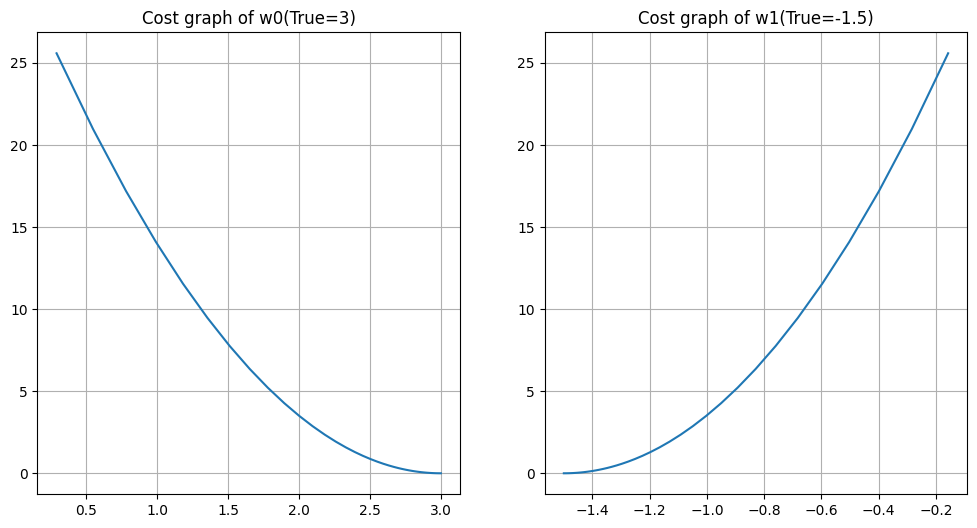

In [181]:
import matplotlib.pyplot as plt

w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.tensor([1.0], requires_grad=True)

lr = 0.01
num_epochs = 100
net = linreg
loss = squared_loss
w_val = [[], []]
loss_val = []


for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        w_val[0].append(w.data.numpy().tolist()[0][0])
        w_val[1].append(w.data.numpy().tolist()[1][0])
        loss_val.append(float(train_l.mean()))

fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(w_val[0], loss_val)
plt.title('Cost graph of w0(True=3)')

plt.subplot(1, 2, 2)
plt.grid()
plt.plot(w_val[1], loss_val)
plt.title('Cost graph of w1(True=-1.5)')

plt.show()

### Concise Implementation of Linear Regression
- API 사용해보기

In [183]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([3, -1.5])
true_b = 5.5
features, labels = d2l.synthetic_data(true_w, true_b, 2000)

In [184]:
def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator."""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 20
data_iter = load_array((features, labels), batch_size)

In [185]:
next(iter(data_iter))

[tensor([[-0.2632,  0.1657],
         [ 1.9290,  0.0678],
         [-1.0106, -0.9906],
         [ 1.3364,  0.0562],
         [ 0.3658, -0.5045],
         [-0.6944,  0.9410],
         [-0.2995, -1.5531],
         [ 1.4027,  0.7125],
         [-0.8135,  0.1189],
         [-0.1673,  0.0160],
         [ 0.0103,  0.5527],
         [ 0.1882,  1.4064],
         [ 1.1252,  0.0432],
         [-0.7920, -1.7680],
         [-0.3118, -0.7094],
         [ 0.1952, -0.8297],
         [-1.1580,  0.0323],
         [-0.8342,  0.3262],
         [-0.2127, -0.4996],
         [-0.4724,  1.4537]]),
 tensor([[ 4.4786],
         [11.1780],
         [ 3.9663],
         [ 9.4098],
         [ 7.3583],
         [ 2.0134],
         [ 6.9321],
         [ 8.6538],
         [ 2.8826],
         [ 4.9841],
         [ 4.7026],
         [ 3.9637],
         [ 8.8155],
         [ 5.7702],
         [ 5.6265],
         [ 7.3310],
         [ 1.9871],
         [ 2.5202],
         [ 5.6172],
         [ 1.8958]])]

In [186]:
from torch import nn

net = nn.Sequential(
    nn.Linear(2, 1, bias=True) ###채워넣기
    )

In [187]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [188]:
loss = nn.MSELoss() ###api function으로 직접 설정

In [189]:
trainer = torch.optim.SGD(net.parameters(), lr=0.01) ###api function으로 직접 설정

In [190]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y) ###직접설정
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.796963
epoch 2, loss 0.016032
epoch 3, loss 0.000421


In [191]:
w = net[0].weight.data
print('error in estimating w:', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('error in estimating b:', true_b - b)

error in estimating w: tensor([ 0.0095, -0.0055])
error in estimating b: tensor([0.0144])
